# Project (AUSTO_AUTOMOBILE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The Data we need
df=pd.read_csv('austo_automobile.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [3]:
# Dealing with null values 
# fill_missing_Partner_salary with zero;
df['Partner_salary'].fillna(0, inplace=True)
# Replace Femal,Femle  with Female;
df['Gender']=df['Gender'].replace(to_replace=['Femal','Femle'],value='Female')
# fill null with 'Male'
df['Gender'].fillna('Male', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3296\2643050537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Partner_salary'].fillna(0, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3296\2643050537.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [4]:
# Taking look at the data
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


# Checking Distribution of Numerical Features

<Axes: xlabel='Age', ylabel='Count'>

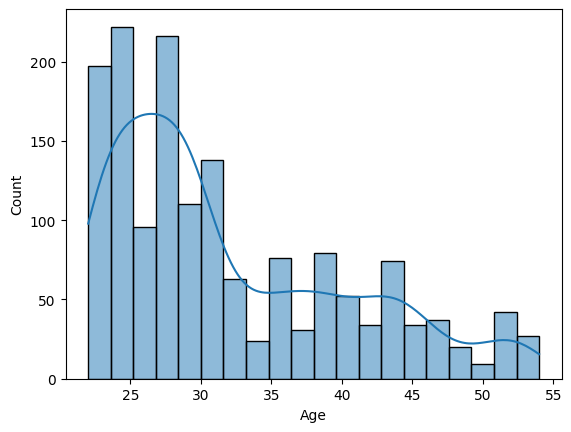

In [5]:
# Age Distribution 
sns.histplot(df['Age'], bins=20, kde=True)

# Categorical Feature Analysis

<Axes: xlabel='Gender', ylabel='count'>

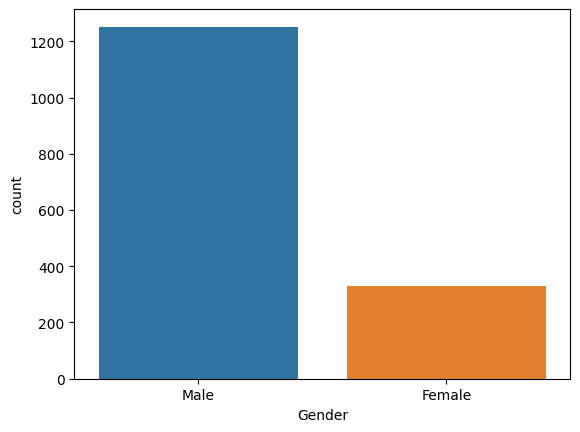

In [13]:
# Gender Distribution:
sns.countplot(x='Gender', data=df, hue='Gender')

<Axes: xlabel='Education', ylabel='Total_salary'>

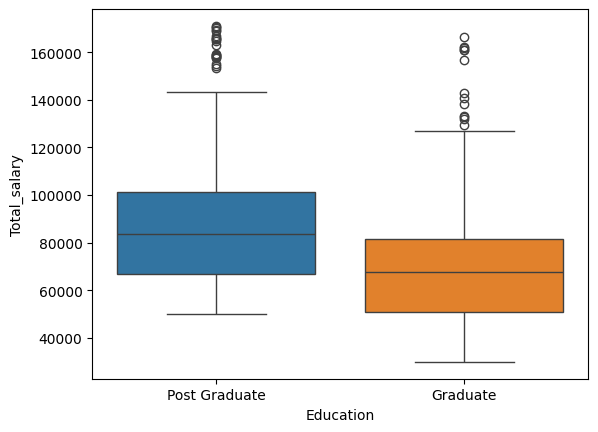

In [139]:
# Impact of Education on Total Salary:
sns.boxplot(x='Education', y='Total_salary', data=df,hue='Education')

Post graduates has more Toatl salary then Graduates

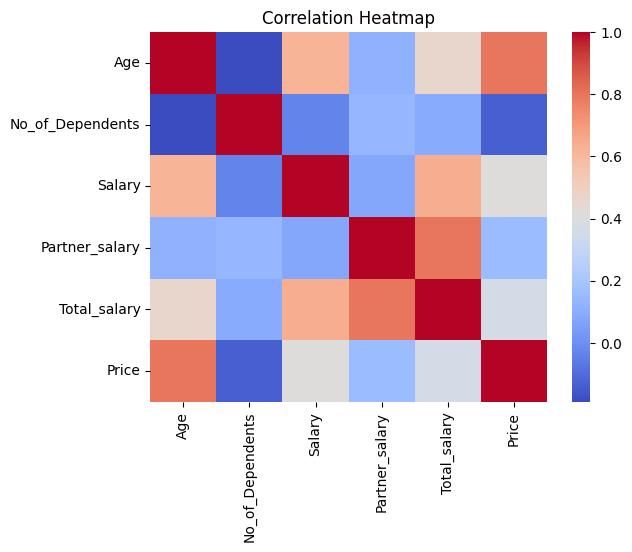

In [19]:
# Calculate and visualize correlations
dff=df[['Age', 'No_of_Dependents','Salary','Partner_salary','Total_salary','Price',]]
sns.heatmap(dff.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Total_salary strongly correlates with Salary and moderately with Partner_salary, showing dual incomes boost earnings. 
Price links moderately to Total_salary but weakly to Salary, indicating household income drives purchases more than individual earnings.
Age, No_of_Dependents, and Partner_salary show minimal impact on buying behavior.

# Analyzing the Data on Behalf of the Employees' Statement

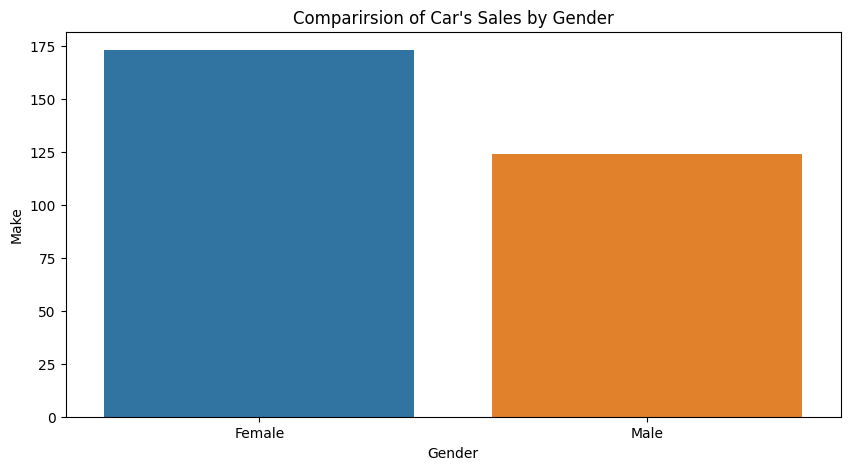

In [30]:
# Check the data for E1.(Steve Roger : “Men prefer SUV by a large margin, compared to the women.”)
plt.figure(figsize=(10,5))
suv_count = df[df['Make'] == 'SUV'].groupby('Gender')['Make'].count().reset_index()
sns.barplot(y='Make', x='Gender',data=suv_count,hue='Gender')
plt.title("Comparirsion of Car's Sales by Gender")
plt.show()

Statemnet of E1 is match with the Data

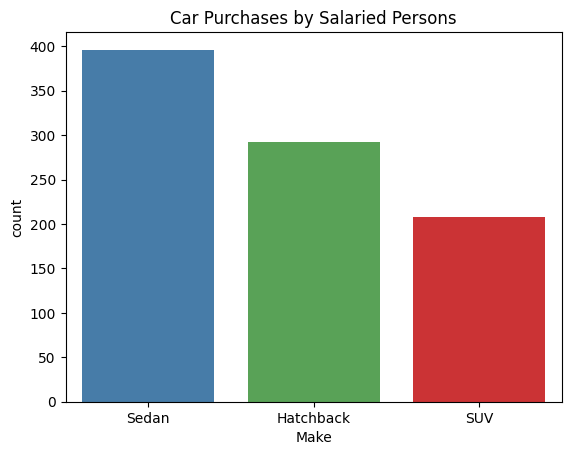

In [142]:
# Check the data for E2.(Ned Stark : "Salaried person is more likely to buy a Sedan.")
salaried_df = df[df['Profession'] == 'Salaried']
car_counts = salaried_df['Make'].value_counts()
sns.countplot(x='Make', data=salaried_df, order=car_counts.index,hue='Make',palette='Set1')
plt.title('Car Purchases by Salaried Persons')
plt.show()

Observation given by E2 is Correct that 'Salaried person is more likely to buy a Sedan'.

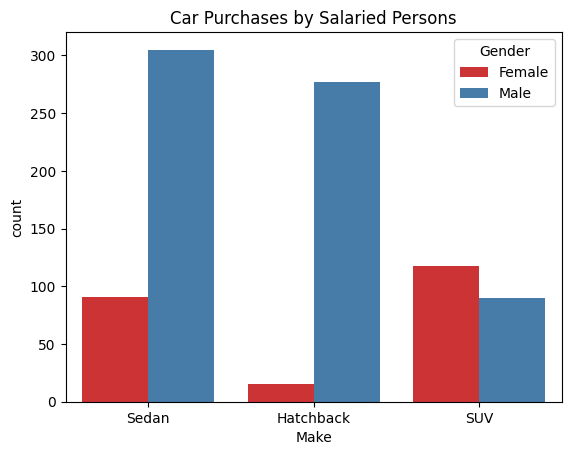

In [32]:
# Check the data for E3.(Sheldon Cooper : "Salaried male is an easier target for a SUV sale over a Sedan Sale.")
salaried_df = df[df['Profession'] == 'Salaried']
car_counts = salaried_df['Make'].value_counts()
sns.countplot(x='Make', data=salaried_df, order=car_counts.index,hue='Gender',palette='Set1')
plt.title('Car Purchases by Salaried Persons')
plt.show()

The Observation of the E3 is also correct the chart suggests that Sedan is the most popular choice among salaried males, significantly more than SUVs. 

# Analyzing the data across Gender and Personal Loan

        Make  Gender         Price
0  Hatchback  Female  27466.666667
1  Hatchback    Male  26447.971781
2        SUV  Female  53479.768786
3        SUV    Male  59096.774194
4      Sedan  Female  42773.049645
5      Sedan    Male  32550.802139


Text(0, 0.5, 'Average Price')

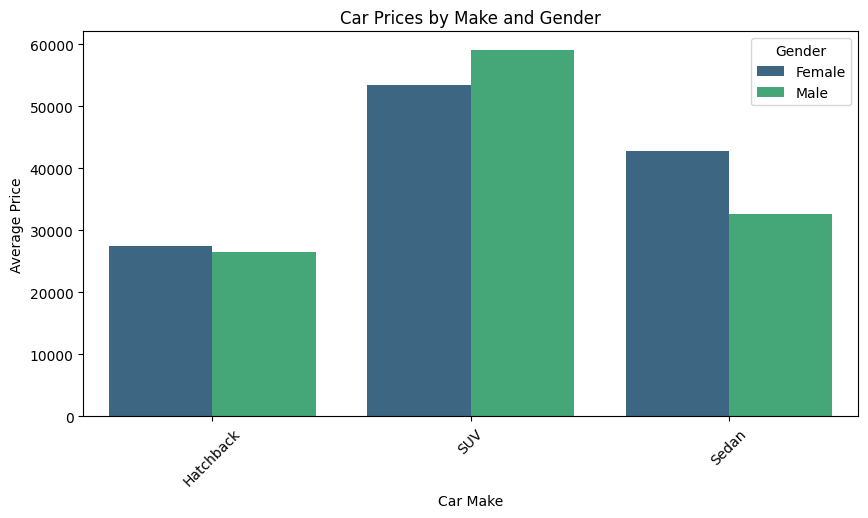

In [25]:
# Gender;
avg_price1=df.groupby(['Make','Gender'])['Price'].mean().reset_index()
print(avg_price1)
plt.figure(figsize=(10,5))
sns.barplot(x='Make',y='Price',data=avg_price1,hue='Gender',palette='viridis',errorbar=None)
plt.xticks(rotation=45)
plt.title('Car Prices by Make and Gender')
plt.xlabel('Car Make')
plt.ylabel('Average Price')

From the chart, it is clear that men show a greater preference for SUVs, while women are more interested in Sedans. If the company targets its marketing efforts towards promoting SUVs to women and Sedans to men, it could potentially enhance sales. Additionally, Hatchbacks are less popular among both genders, indicating an opportunity for the company to focus more on this segment to boost its appeal.

        Make Personal_loan         Price
0  Hatchback            No  26683.848797
1  Hatchback           Yes  26264.604811
2        SUV            No  57309.392265
3        SUV           Yes  53508.620690
4      Sedan            No  34233.438486
5      Sedan           Yes  34909.090909


Text(0, 0.5, 'Average Price')

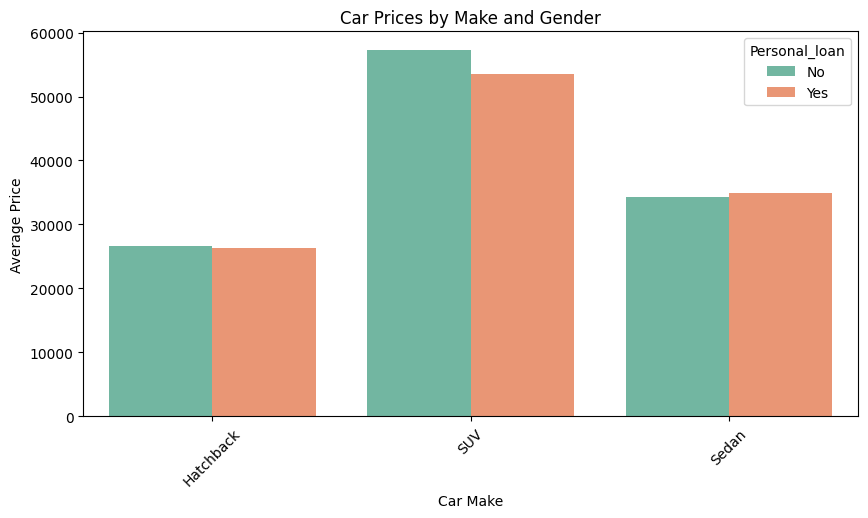

In [145]:
# For Personal_loan
avg_price2=df.groupby(['Make','Personal_loan'])['Price'].mean().reset_index()
print(avg_price2)
plt.figure(figsize=(10,5))
sns.barplot(x='Make',y='Price',data=avg_price2,hue='Personal_loan',palette='Set2',errorbar=None)
plt.xticks(rotation=45)
plt.title('Car Prices by Make and Gender')
plt.xlabel('Car Make')
plt.ylabel('Average Price')

In all categories, there is no major difference in average car prices between people who took personal loans and those who did not. However, for SUVs, the average price for loan takers appears slightly lower.

# Analyzing if having a working partner leads to the purchase of a higher-priced car or not.

  Partner_working         Price
0              No  36000.000000
1             Yes  35267.281106


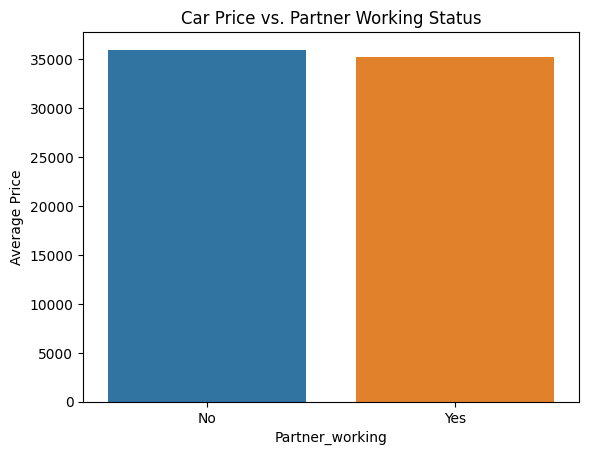

In [33]:
avg_price = df.groupby('Partner_working')['Price'].mean().reset_index()
print(avg_price)
# Visualize using Boxplot
sns.barplot(x='Partner_working', y='Price', data=avg_price,hue='Partner_working')
plt.ylabel('Average Price')
plt.title('Car Price vs. Partner Working Status')
plt.show()

the average of  car price is slightly lower for those with a working partner, having a working partner does not lead to the purchase of higher-priced cars.

# Analyzing data for Average Price across Gender over Marital_status 

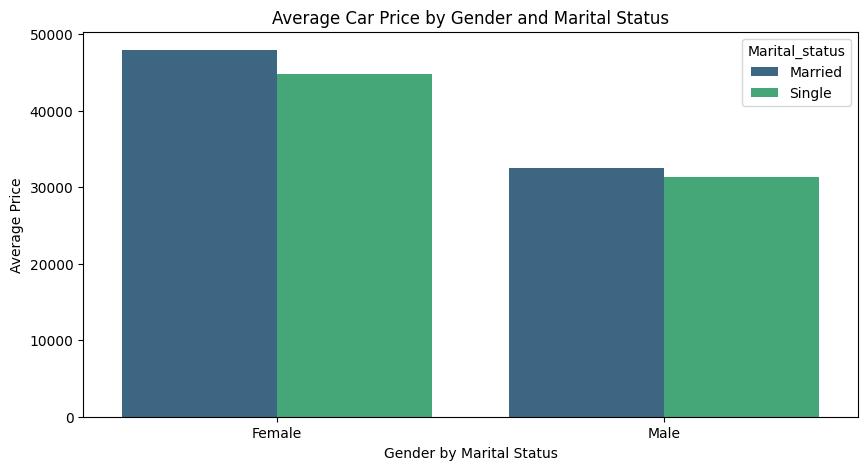

In [147]:
# Calculate average price by Gender and Marital Status
avg_price = df.groupby(['Gender', 'Marital_status'])['Price'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Price', data=avg_price, hue='Marital_status', palette='viridis')
plt.xlabel('Gender by Marital Status')
plt.ylabel('Average Price')
plt.title('Average Car Price by Gender and Marital Status')
plt.show()


In the case of marital status, married individuals show a higher interest in purchasing cars compared to singles. Additionally, females demonstrate more interest and make more purchases than males. Therefore, the company should focus more on female customers while also developing strategies to better attract male customers.